In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.6 MB/s eta 0:00:00


In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import sklearn;
import tensorflow as tf;

In [ ]:
# for access to google drive
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [ ]:
!ls /gdrive/MyDrive/BrainTumor_TestTrain/test-train/Training/
!ls /gdrive/MyDrive/BrainTumor_TestTrain/test-train/Testing/

glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor
glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


In [ ]:
batch_size = 32
img_height = 244
img_width = 244

# Load the dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    '/gdrive/MyDrive/BrainTumor_TestTrain/test-train/Training',
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=101
)


Found 2902 files belonging to 4 classes.


In [ ]:
class_names = dataset.class_names

In [ ]:
print("The class names found in the directory are:")
print(class_names)

The class names found in the directory are:
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


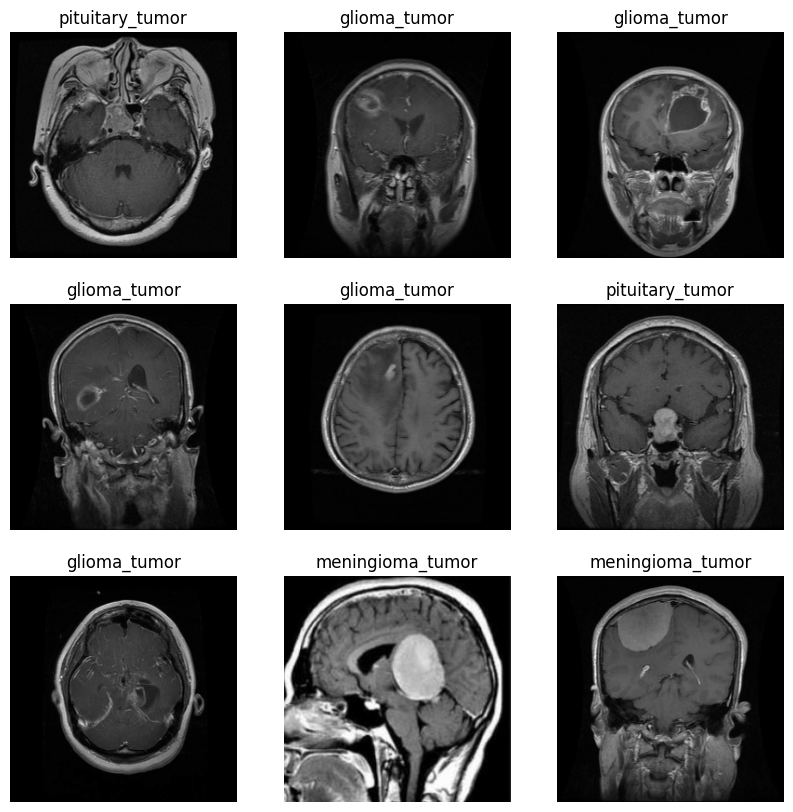

In [ ]:
for images, labels in dataset.take(1): #taking 1 batch from 32 batches
  plt.figure(figsize=(10, 10))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(images[i]), cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")
  plt.show()

In [ ]:
def normalize_image(image, label):
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

ds = dataset.map(normalize_image)

In [ ]:
# Split into train and validation datasets
val_size = 0.2

val_batches = int(len(dataset) * val_size)
print("val_batches", val_batches)
train_batches = len(dataset) - val_batches

train_dataset = ds.take(train_batches)
val_dataset = ds.skip(train_batches)


val_batches 18


In [ ]:
TRAINING_PATH = '/gdrive/MyDrive/BrainTumor_TestTrain/test-train/Training'
TESTING_PATH = '/gdrive/MyDrive/BrainTumor_TestTrain/test-train/Testing'

Generating Class Distribution Plot...


/tmp/ipython-input-1317289355.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), ax=ax1, palette='viridis')
/tmp/ipython-input-1317289355.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), ax=ax2, palette='viridis')


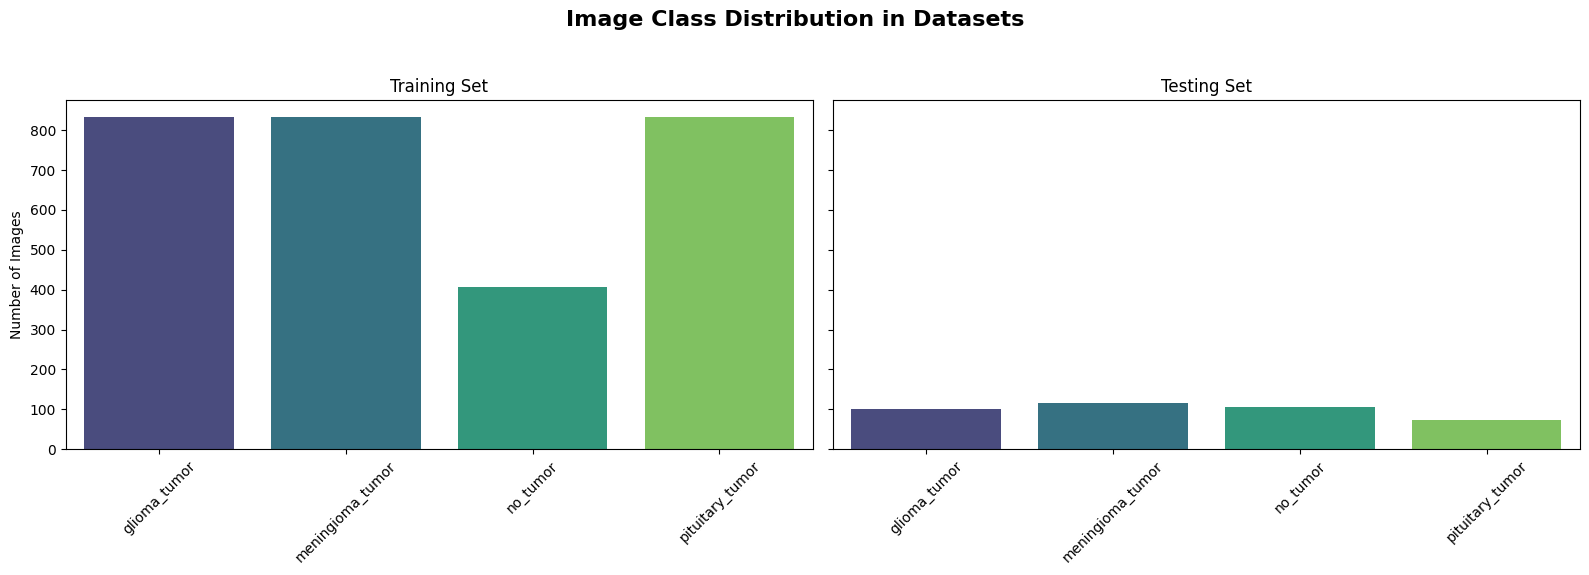

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
import os
print("Generating Class Distribution Plot...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Image Class Distribution in Datasets', fontsize=16, fontweight='bold')

train_counts = {name: len(os.listdir(os.path.join(TRAINING_PATH, name))) for name in class_names}
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), ax=ax1, palette='viridis')
ax1.set_title('Training Set')
ax1.set_ylabel('Number of Images')
ax1.tick_params(axis='x', rotation=45)

test_counts = {name: len(os.listdir(os.path.join(TESTING_PATH, name))) for name in class_names}
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), ax=ax2, palette='viridis')
ax2.set_title('Testing Set')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Generating Class Distribution Plots...


/tmp/ipython-input-1756308666.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette='viridis')


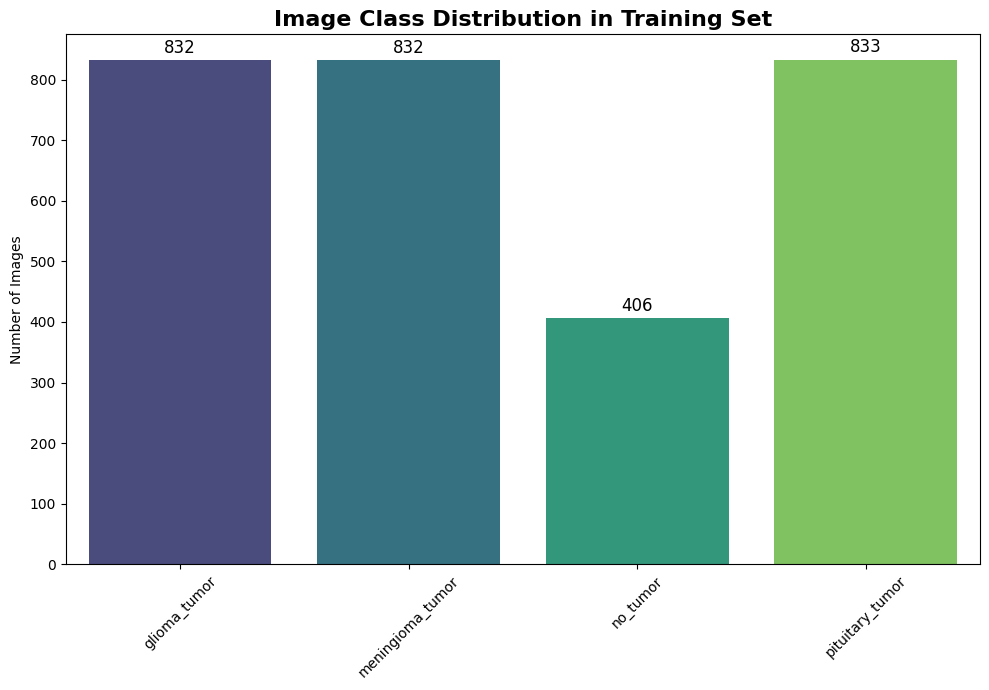

/tmp/ipython-input-1756308666.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), palette='viridis')


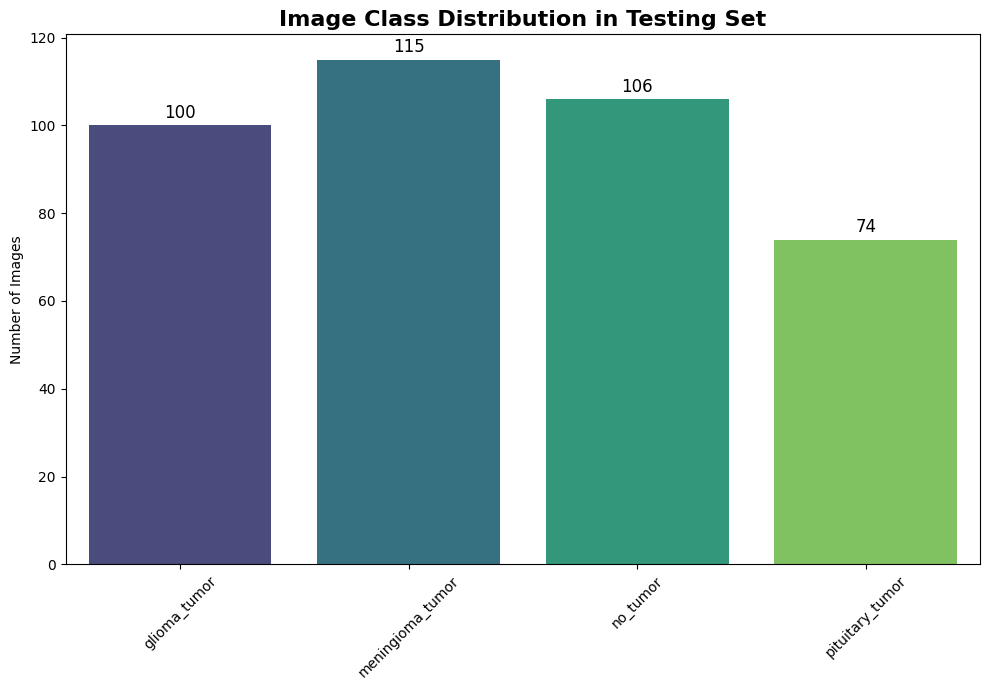

In [ ]:
print("Generating Class Distribution Plots...")

plt.figure(figsize=(10, 7))
train_counts = {name: len(os.listdir(os.path.join(TRAINING_PATH, name))) for name in class_names}
ax1 = sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette='viridis')

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   fontsize=12,
                   color='black',
                   xytext=(0, 9),
                   textcoords='offset points')

ax1.set_title('Image Class Distribution in Training Set', fontsize=16, fontweight='bold')
ax1.set_ylabel('Number of Images')
ax1.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 7))
test_counts = {name: len(os.listdir(os.path.join(TESTING_PATH, name))) for name in class_names}
ax2 = sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), palette='viridis')

for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   fontsize=12,
                   color='black',
                   xytext=(0, 9),
                   textcoords='offset points')

ax2.set_title('Image Class Distribution in Testing Set', fontsize=16, fontweight='bold')
ax2.set_ylabel('Number of Images')
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(img_height, img_width, 1)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation= 'relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 242, 242, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 240, 240, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 120, 120, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 118, 118, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 116, 116, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 215296)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 215296)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     6,889,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,954,628 (26.53 MB)

 Trainable params: 6,954,628 (26.53 MB)

 Non-trainable params: 0 (0.00 B)

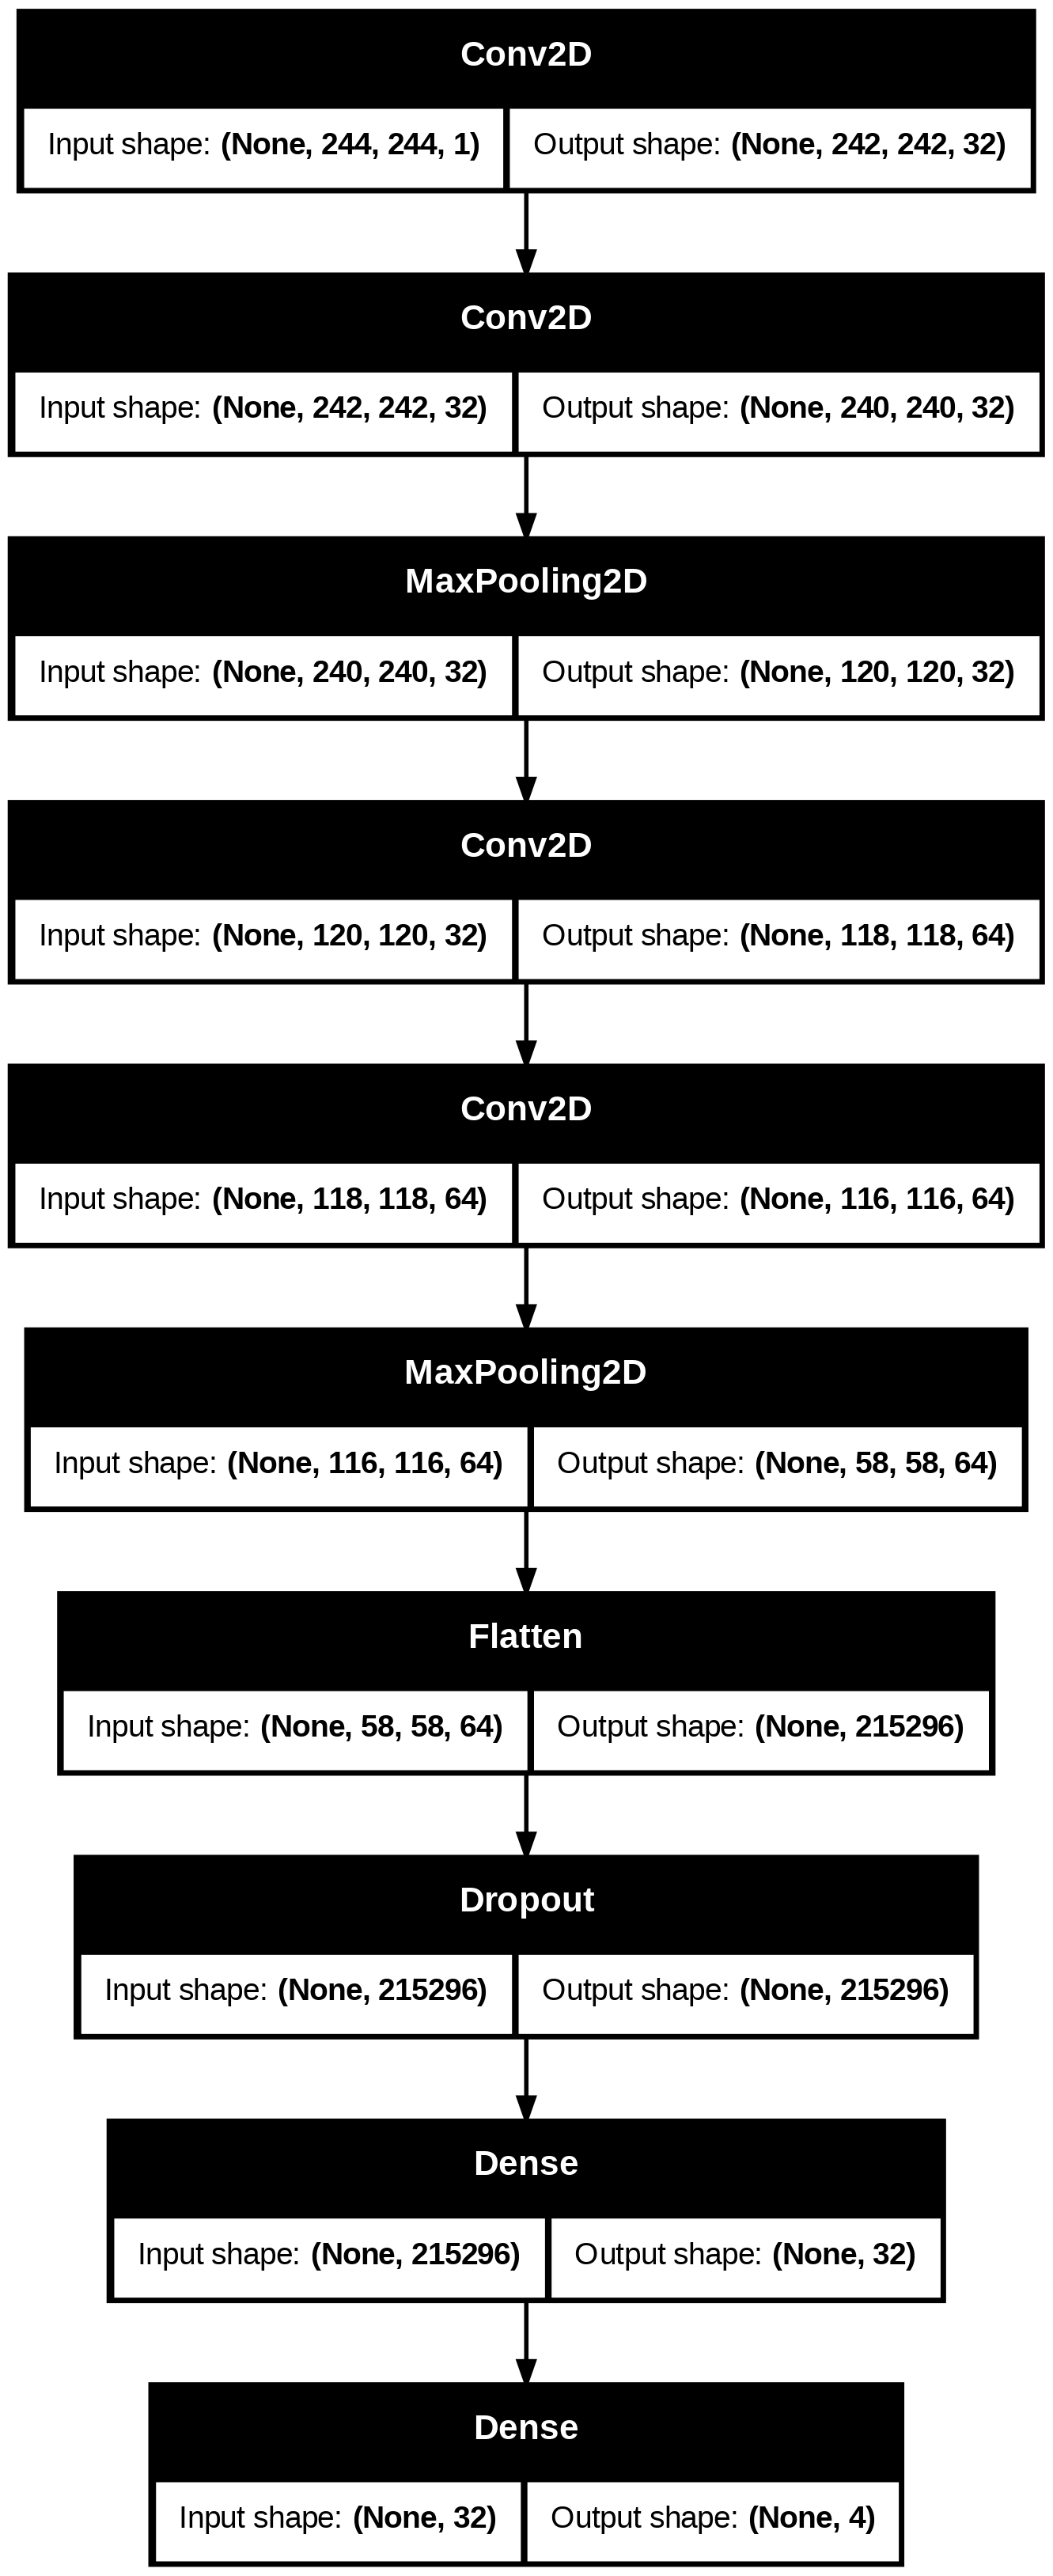

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.0001),
              loss= tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)


reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    verbose=1,
    min_lr=1e-6
)

callbacks_list = [early_stopping, reduce_lr_on_plateau]

In [ ]:
history = model.fit(train_dataset,
          epochs=17,
          validation_data=val_dataset,
          callbacks= callbacks_list
          )

Epoch 1/17
73/73 ━━━━━━━━━━━━━━━━━━━━ 694s 9s/step - accuracy: 0.4486 - loss: 1.2175 - val_accuracy: 0.5265 - val_loss: 1.0057 - learning_rate: 1.0000e-04
Epoch 2/17
73/73 ━━━━━━━━━━━━━━━━━━━━ 635s 9s/step - accuracy: 0.6330 - loss: 0.8417 - val_accuracy: 0.6413 - val_loss: 0.8095 - learning_rate: 1.0000e-04
Epoch 3/17
73/73 ━━━━━━━━━━━━━━━━━━━━ 628s 9s/step - accuracy: 0.7322 - loss: 0.6521 - val_accuracy: 0.7491 - val_loss: 0.6030 - learning_rate: 1.0000e-04
Epoch 4/17
73/73 ━━━━━━━━━━━━━━━━━━━━ 641s 9s/step - accuracy: 0.7884 - loss: 0.5240 - val_accuracy: 0.8004 - val_loss: 0.5371 - learning_rate: 1.0000e-04
Epoch 5/17
73/73 ━━━━━━━━━━━━━━━━━━━━ 629s 9s/step - accuracy: 0.8408 - loss: 0.4410 - val_accuracy: 0.7968 - val_loss: 0.4966 - learning_rate: 1.0000e-04
Epoch 6/17
73/73 ━━━━━━━━━━━━━━━━━━━━ 627s 9s/step - accuracy: 0.8712 - loss: 0.3451 - val_accuracy: 0.8057 - val_loss: 0.5048 - learning_rate: 1.0000e-04
Epoch 7/17
73/73 ━━━━━━━━━━━━━━━━━━━━ 627s 9s/step - accuracy: 0.8702 

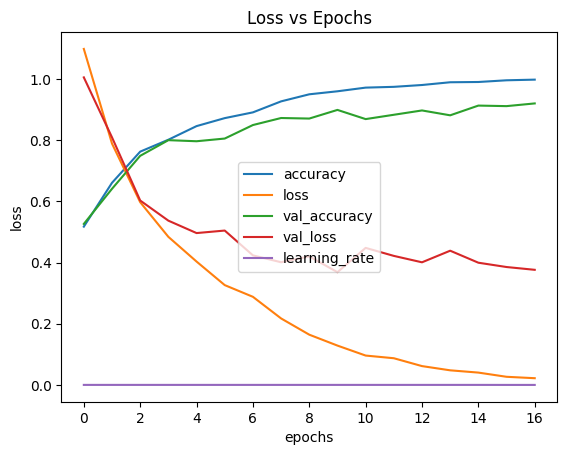

In [ ]:
pd.DataFrame(model.history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Loss vs Epochs')
plt.show()

In [ ]:
batch_size = 32
img_height = 244
img_width = 244

# Load the dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    '/gdrive/MyDrive/BrainTumor_TestTrain/test-train/Testing',
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=101
)

Found 394 files belonging to 4 classes.


In [ ]:
def normalize_image(image, label):
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

ds_test = test_ds.map(normalize_image)

In [ ]:
model.evaluate(ds_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.7416 - loss: 2.2015


[2.2339491844177246, 0.7461928725242615]

In [ ]:
y_true = []
y_pred = []

for images, labels in ds_test:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


In [ ]:
len(y_pred), len(y_true)

(394, 394)

Model Evaluation

Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.92      0.24      0.38       100
meningioma_tumor       0.75      0.93      0.83       115
        no_tumor       0.65      1.00      0.79       105
 pituitary_tumor       0.91      0.78      0.84        74

        accuracy                           0.75       394
       macro avg       0.81      0.74      0.71       394
    weighted avg       0.80      0.75      0.71       394


Confusion Matrix


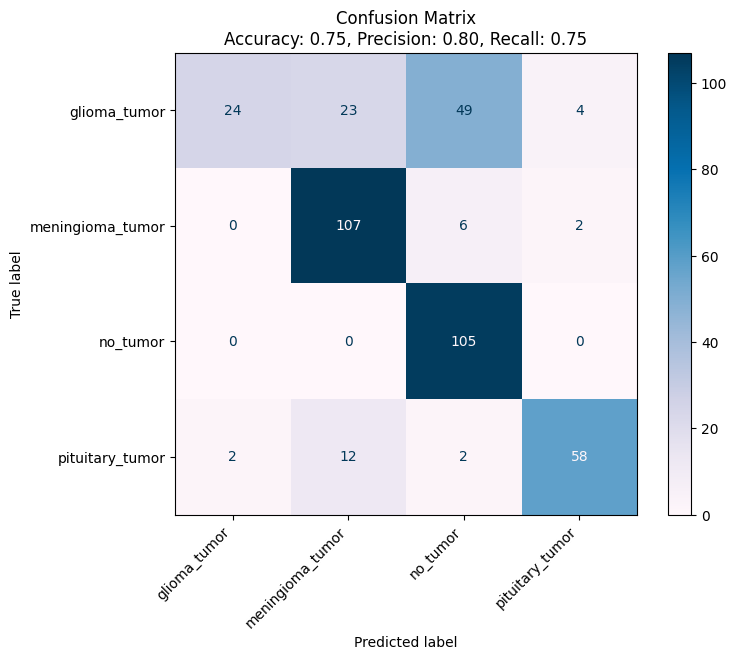

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

print('====================')
print('Model Evaluation')
print('====================')
print()

print('====================')
print('Classification Report')
print('====================')

class_names = dataset.class_names
print(metrics.classification_report(y_true, y_pred, target_names=class_names))
print()

print('====================')
print('Confusion Matrix')
print('====================')
accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred, average='weighted')
recall = metrics.recall_score(y_true, y_pred, average='weighted')


class_labels = np.unique(y_true).tolist()
cm = metrics.confusion_matrix(y_true, y_pred, labels=class_labels)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='PuBu', values_format='d')
ax.set_title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
ax.set_xticklabels(class_names, rotation=45, ha='right')
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


def predict_image(image_path, model, class_names):
    img = tf.keras.preprocessing.image.load_img(
        image_path, color_mode='grayscale', target_size=(244, 244)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)
    # normalize pixel values to [0, 1]
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_names[predicted_class]

    true_class = os.path.basename(os.path.dirname(image_path))

    plt.figure()
    plt.imshow(tf.squeeze(img_array), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, True: {true_class}")
    plt.axis('off')
    plt.show()
    return predicted_label, true_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


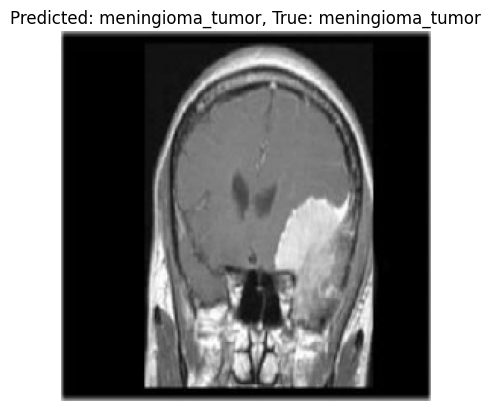

Predicted: meningioma_tumor, True: meningioma_tumor


In [ ]:
test_image_path = '/gdrive/MyDrive/BrainTumor_TestTrain/test-train/Testing/meningioma_tumor/image(1).jpg'
predicted, true = predict_image(test_image_path, model, dataset.class_names)
print(f"Predicted: {predicted}, True: {true}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


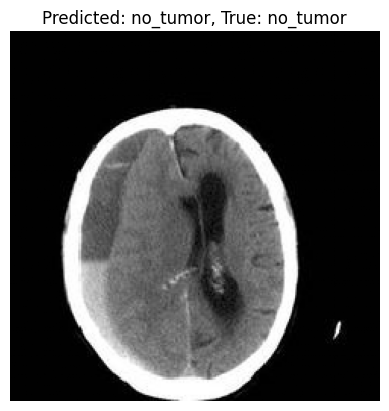

Predicted: no_tumor, True: no_tumor


In [ ]:
test_image_path = '/gdrive/MyDrive/BrainTumor_TestTrain/test-train/Testing/no_tumor/image(1).jpg'
predicted, true = predict_image(test_image_path, model, dataset.class_names)
print(f"Predicted: {predicted}, True: {true}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


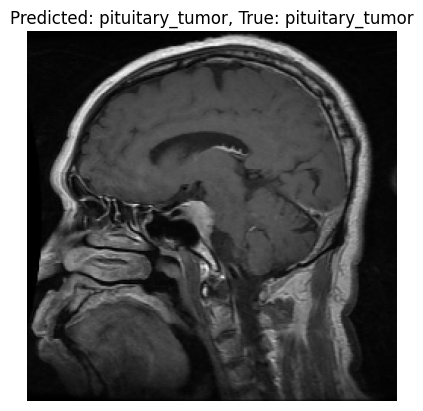

Predicted: pituitary_tumor, True: pituitary_tumor


In [ ]:
test_image_path = '/gdrive/MyDrive/BrainTumor_TestTrain/test-train/Testing/pituitary_tumor/image(1).jpg'
predicted, true = predict_image(test_image_path, model, dataset.class_names)
print(f"Predicted: {predicted}, True: {true}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


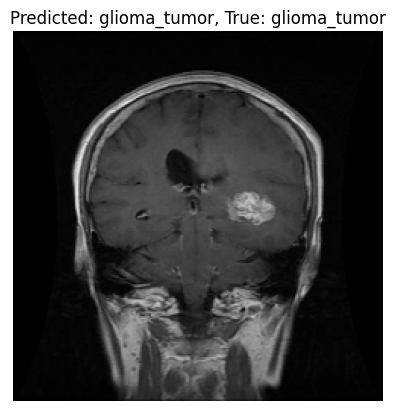

Predicted: glioma_tumor, True: glioma_tumor


In [ ]:
test_image_path = '/gdrive/MyDrive/BrainTumor_TestTrain/test-train/Testing/glioma_tumor/image(60).jpg'
predicted, true = predict_image(test_image_path, model, dataset.class_names)
print(f"Predicted: {predicted}, True: {true}")